<Axes: xlabel='date'>

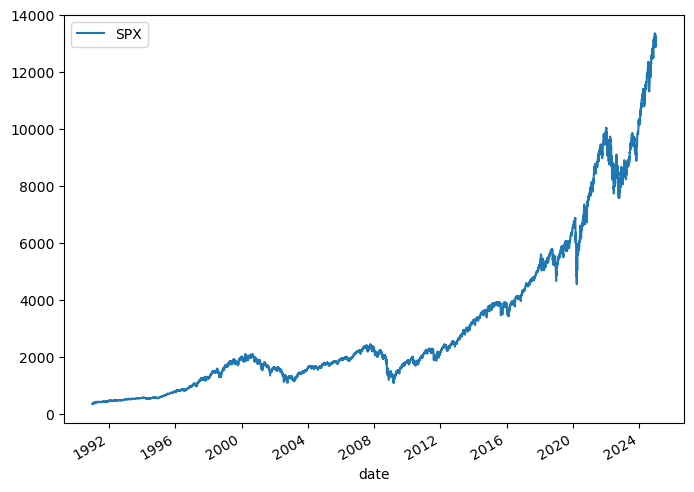

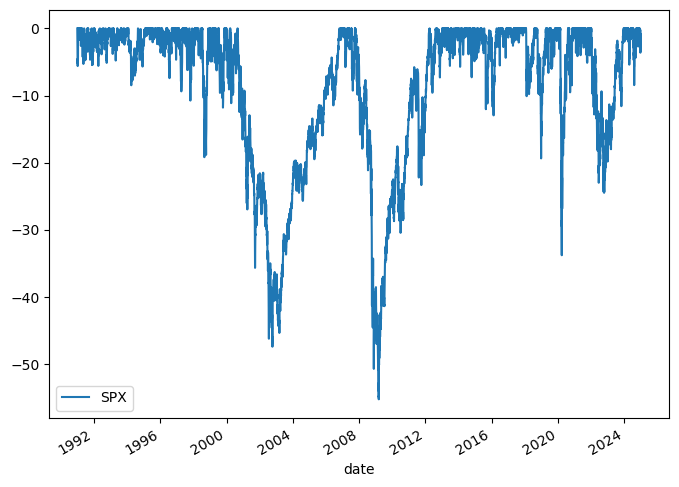

In [11]:
import ucr_db.mssql_utils as db
import pandas as pd
import datetime as dt
import ucr_refdata.tsdb_parser_bnf as bnf

conn = db.aws_mssql_engine('risk01').connect()
tsdb = bnf.TSDB_Parser(conn)
start = dt.date(1990,12,31)
end = dt.date(2024,12,31)

symbols = [
    'SPXT Index;SPX'
]

df = tsdb.evaluate_many(symbols, start, end)
df.index = pd.to_datetime(df.index)
df.plot(figsize=(8,6))
drawdown = (df.div(df.cummax())-1)*100
drawdown.plot(figsize=(8,6))

<Axes: xlabel='date'>

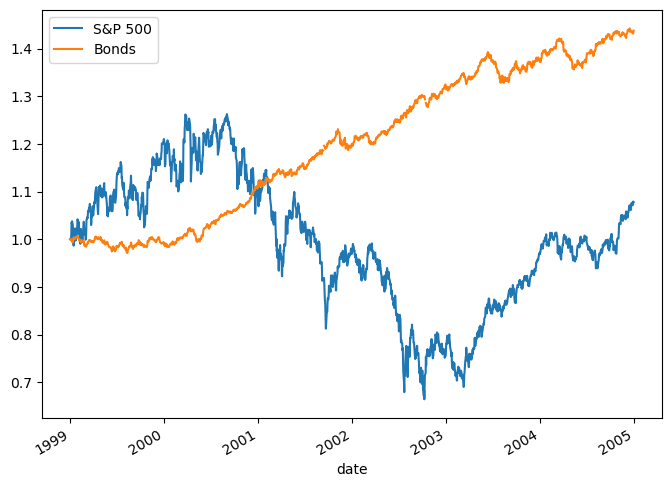

In [2]:
import ucr_db.mssql_utils as db
import pandas as pd
import datetime as dt
import ucr_refdata.tsdb_parser_bnf as bnf

conn = db.aws_mssql_engine('risk01').connect()
tsdb = bnf.TSDB_Parser(conn)
start = dt.date(1998,12,31)
end = dt.date(2004,12,31)

symbols = [
    'ind(SPXT Index);S&P 500',
    'ind(LBUSTRUU Index);Bonds'
]

df = tsdb.evaluate_many(symbols, start, end)
df.index = pd.to_datetime(df.index)
df.plot(figsize=(8,6))

<Axes: xlabel='date'>

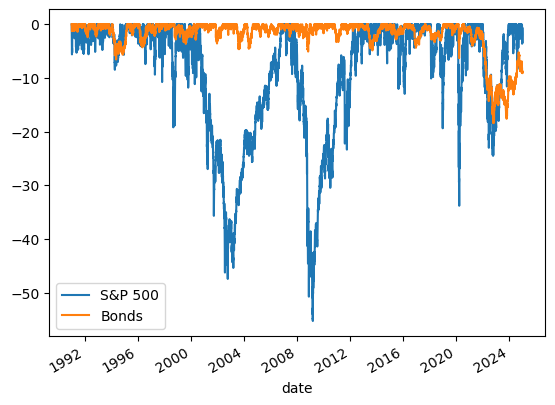

In [9]:
drawdown = (df.div(df.cummax())-1)*100
drawdown.plot()

,cagr,vol,sharpe,max_dd
SPX,1.252901,15.934099,0.157157,-44.733728
60/40,3.831932,8.953849,0.464712,-21.369804
30/70,5.247398,4.737992,1.105006,-3.562174


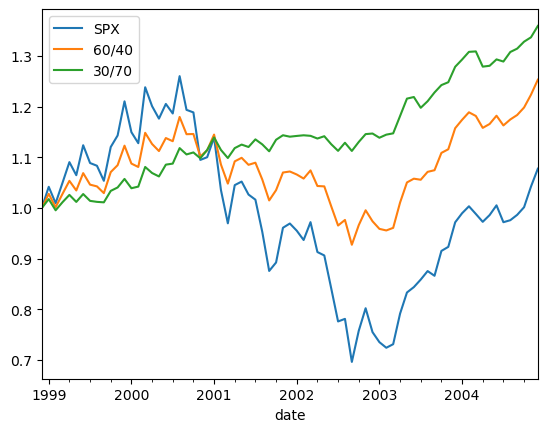

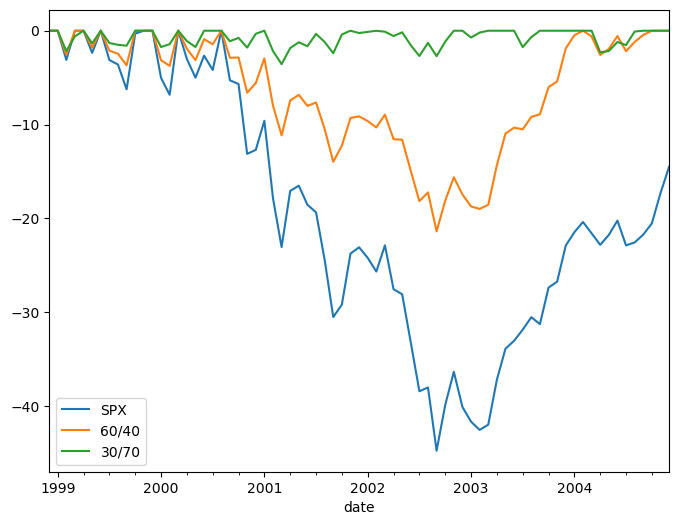

In [6]:
import ucr_db.mssql_utils as db
import pandas as pd
import datetime as dt
import ucr_refdata.tsdb_parser_bnf as bnf
import numpy as np
conn = db.aws_mssql_engine('risk01').connect()
tsdb = bnf.TSDB_Parser(conn)
start = dt.date(1998,12,31)
end = dt.date(2004,12,31)

symbols = [
    'ind(eom(SPXT Index));SPX',
    #'backtest(eom(SPXT Index), 0.9, eom(LBUSTRUU Index), 0.1, "Annually");90/10',
    #'backtest(eom(SPXT Index), 0.8, eom(LBUSTRUU Index), 0.2, "Annually");80/20',
    #'backtest(eom(SPXT Index), 0.7, eom(LBUSTRUU Index), 0.3, "Annually");70/30',
    'backtest(eom(SPXT Index), 0.6, eom(LBUSTRUU Index), 0.4, "Annually");60/40',
    #'backtest(eom(SPXT Index), 0.5, eom(LBUSTRUU Index), 0.5, "Annually");50/50',
    #'backtest(eom(SPXT Index), 0.4, eom(LBUSTRUU Index), 0.6, "Annually");40/60',
    'backtest(eom(SPXT Index), 0.3, eom(LBUSTRUU Index), 0.7, "Annually");30/70',
    #'backtest(eom(SPXT Index), 0.2, eom(LBUSTRUU Index), 0.8, "Annually");20/90',
    #'backtest(eom(SPXT Index), 0.1, eom(LBUSTRUU Index), 0.9, "Annually");10/90',
]

df = tsdb.evaluate_many(symbols, start, end)
df.index = pd.to_datetime(df.index)
df.plot()
drawdown = (df.div(df.cummax())-1)*100
drawdown.plot(figsize=(8,6))

def stats(df):
    n = len(df) - 1
    perf = df.iloc[-1]/df.iloc[0]
    cagr = 100*(np.power(perf,12/n)-1)
    returns = df/df.shift()-1
    vol = returns.std()*np.sqrt(12)*100
    sharpe = returns.mean()/returns.std()*np.sqrt(12)
    drawdown = df.div(df.cummax())-1
    max_dd = drawdown.min()*100
    stats_df = pd.concat([cagr, vol, sharpe, max_dd], axis=1)
    stats_df.columns = ['cagr', 'vol', 'sharpe', 'max_dd']
    return stats_df
stats(df)

<Axes: xlabel='date'>

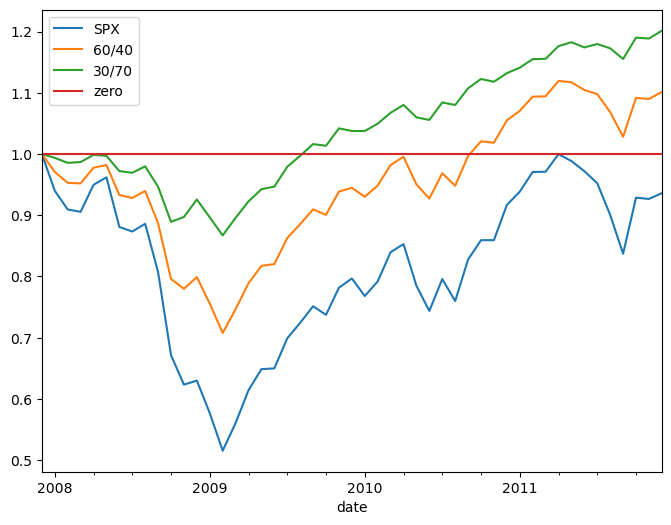

In [35]:
def rebase(df, start, end):
    new_df = df[(df.index >= start) & (df.index <= end)]
    new_df = new_df / new_df.iloc[0]
    return new_df
rebased = rebase(df, '2007-12-31', '2011-12-31')
rebased['zero'] = 1
rebased.plot(figsize=(8,6))

<Axes: xlabel='date'>

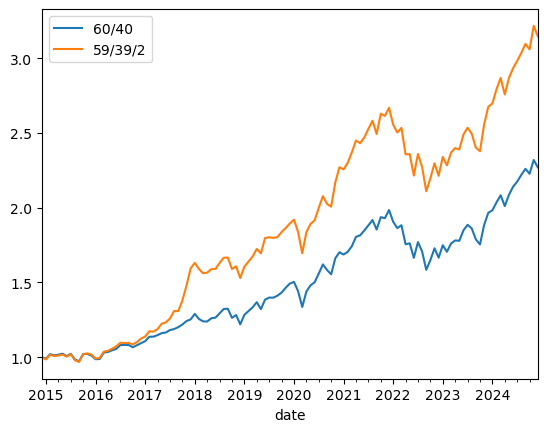

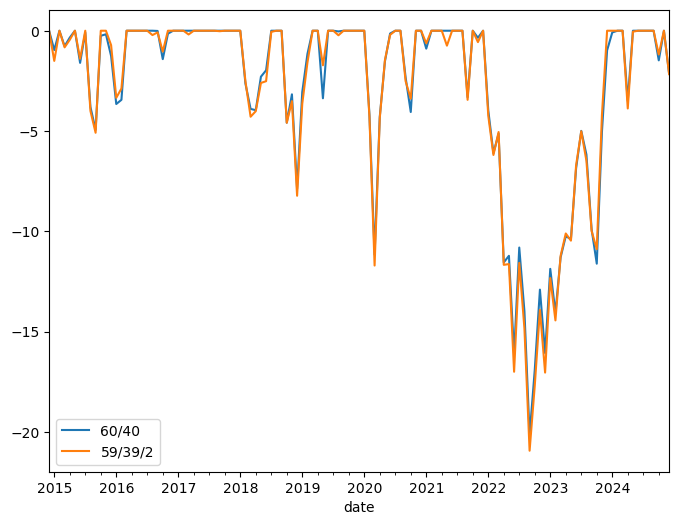

In [43]:
import ucr_db.mssql_utils as db
import pandas as pd
import datetime as dt
import ucr_refdata.tsdb_parser_bnf as bnf

conn = db.aws_mssql_engine('risk01').connect()
tsdb = bnf.TSDB_Parser(conn)
start = dt.date(2014,12,31)
end = dt.date(2024,12,31)

symbols = [
    #'ind(eom(SPXT Index));SPX',
    'backtest(eom(SPXT Index), 0.6, eom(LBUSTRUU Index), 0.4, "Annually");60/40',
    'backtest(eom(SPXT Index), 0.59, eom(LBUSTRUU Index), 0.39, eom(XBTUSD BGN Curncy), 0.02, "Annually");59/39/2',
]

df = tsdb.evaluate_many(symbols, start, end)
df.index = pd.to_datetime(df.index)
df.plot()
drawdown = (df.div(df.cummax())-1)*100
drawdown.plot(figsize=(8,6))

In [49]:
import numpy as np

def stats(df):
    n = len(df) - 1
    perf = df.iloc[-1]/df.iloc[0]
    cagr = 100*(np.power(perf,12/n)-1)
    returns = df/df.shift()-1
    vol = returns.std()*np.sqrt(12)*100
    sharpe = returns.mean()/returns.std()*np.sqrt(12)
    drawdown = df.div(df.cummax())-1
    max_dd = drawdown.min()*100
    stats_df = pd.concat([cagr, vol, sharpe, max_dd], axis=1)
    stats_df.columns = ['cagr', 'vol', 'sharpe', 'max_dd']
    return stats_df
stats(df)

,cagr,vol,sharpe,max_dd
60/40,8.544269,10.112366,0.863754,-20.164305
59/39/2,12.147781,11.206538,1.083309,-20.941045


<Axes: xlabel='date'>

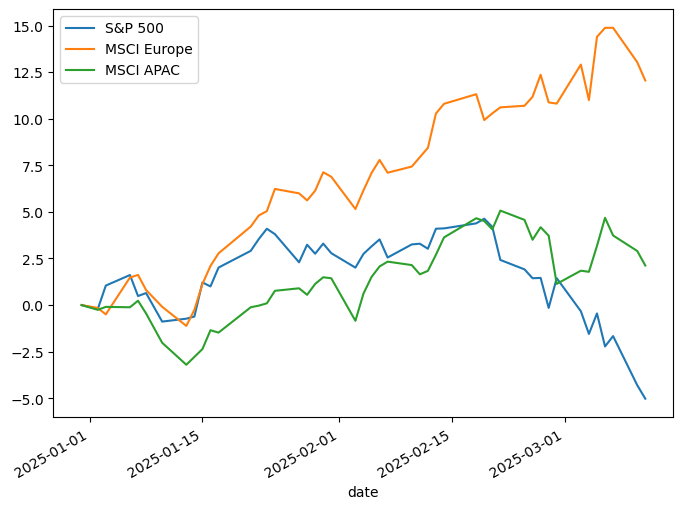

In [55]:
symbols = ['ind(SPXT Index)*100-100;S&P 500',
    'ind(M1EU Index)*100-100;MSCI Europe',
    'ind(M1AP Index)*100-100;MSCI APAC',
       ]
import ucr_db.mssql_utils as db
import pandas as pd
import datetime as dt
import ucr_refdata.tsdb_parser_bnf as bnf

conn = db.aws_mssql_engine('risk01').connect()
tsdb = bnf.TSDB_Parser(conn)
start = dt.date(2024,12,31)
end = dt.date(2025,3,12)
df = tsdb.evaluate_many(symbols, start, end)
df.index = pd.to_datetime(df.index)
df.dropna().plot(figsize=(8,6))